## CodSoft Internship-TASK-1:

#  MOVIE GENRE CLASSIFICATION


### **Problem Statement**: 
 Create a machine learning model that can predict the genre of a  movie based on its plot summary or other textual information. You can use techniques like TF-IDF or word embeddings with classifiers such as Naive Bayes, Logistic Regression, or Support Vector Machines.

### Dataset: https://www.kaggle.com/datasets/hijest/genre-classification-dataset-imdb

# Importing necessary Libraries
 
New Learnings:   
  1. nltk library:   
          > tokenization   
          > stopwords  
          > stemming  
          > lemmatization  
  2. sklearn library:     
          > TfidfVectorizer   
          > LabelEncoder  
          > train_test_split 
          > MultinomialNB   
          > RandomForestClassifier    
          > SVC  
          > accuracy_score  
          > classification_report  
          > GridSearchCV  
          > joblib  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk



from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV



I tried running GridSearchCV on my system locally but it suddenly crashed. I tried to change the parameeters but it still crashed multiple times. I am still figuring out the issue. 

# Data Loading & Framing

 ## Training data:

In [2]:
train_data = pd.read_csv("train_data.txt", sep=':::', names=['Title', 'Genre', 'Description'], engine='python')
train_data

,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
54210,"""Bonino"" (1953)",comedy,This short-lived NBC live sitcom centered on ...
54211,Dead Girls Don't Cry (????),horror,The NEXT Generation of EXPLOITATION. The sist...
54212,Ronald Goedemondt: Ze bestaan echt (2008),documentary,"Ze bestaan echt, is a stand-up comedy about g..."
54213,Make Your Own Bed (1944),comedy,Walter and Vivian live in the country and hav...


## Testing data

In [3]:
test_data = pd.read_csv("test_data.txt", sep=':::', names=['Id', 'Title', 'Description'], engine='python')
test_data

,Id,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
54195,54196,"""Tales of Light & Dark"" (2013)","Covering multiple genres, Tales of Light & Da..."
54196,54197,Der letzte Mohikaner (1965),As Alice and Cora Munro attempt to find their...
54197,54198,Oliver Twink (2007),A movie 169 years in the making. Oliver Twist...
54198,54199,Slipstream (1973),"Popular, but mysterious rock D.J Mike Mallard..."


# EDA

In [4]:
train_data.describe()


,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [5]:
test_data.describe()

,Id
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


In [6]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [7]:
test_data.isnull().sum()

Id             0
Title          0
Description    0
dtype: int64

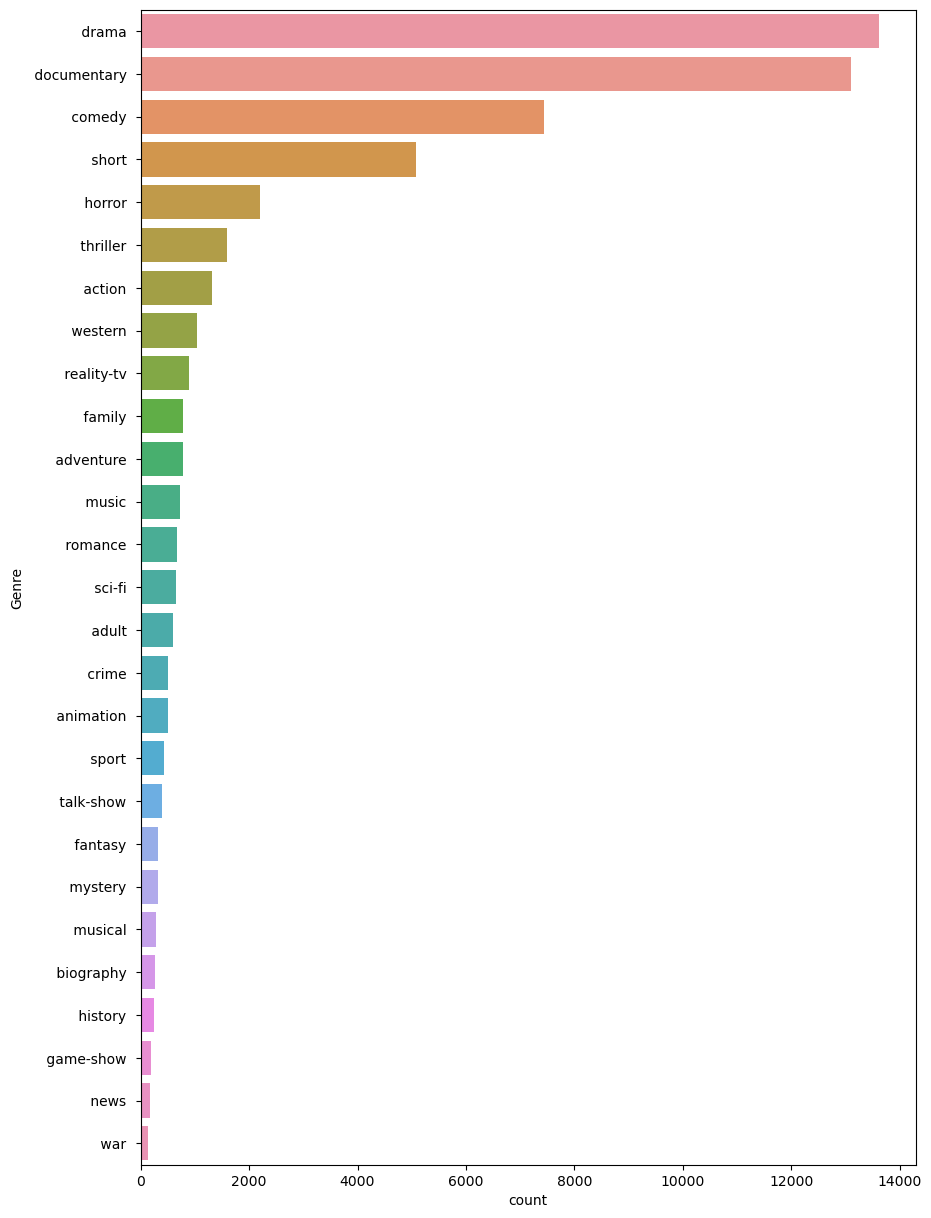

In [8]:
plt.figure(figsize=(10,15))
sns.countplot(data=train_data, y="Genre", order= train_data["Genre"].value_counts().index)
plt.show()



In [9]:
class_distribution = train_data['Genre'].value_counts()
print("Class Distribution:")
print(class_distribution)

Class Distribution:
Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64


In [10]:
imbalance_ratio = class_distribution.min() / class_distribution.max()
print("Imbalance Ratio:", imbalance_ratio)

Imbalance Ratio: 0.009696613531183427


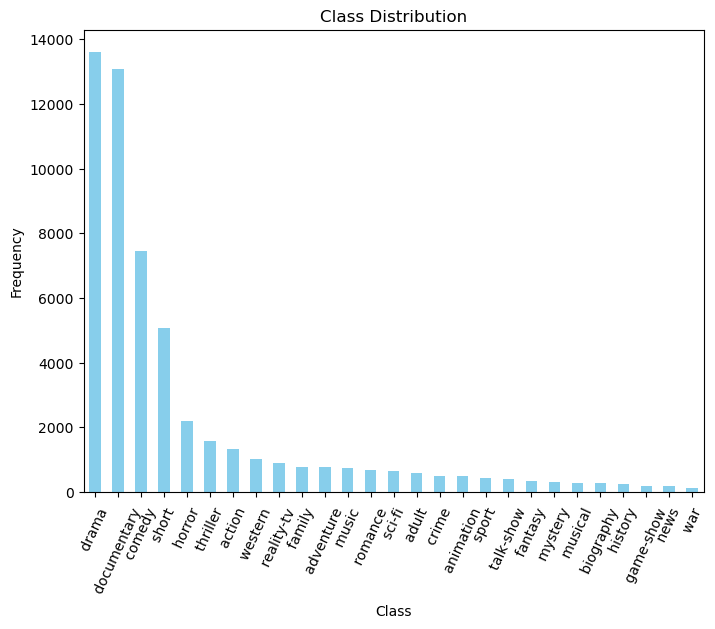

In [11]:
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(rotation=65)
plt.show()

# Lemmatization

In [12]:
Lemmatize_text = WordNetLemmatizer()

def clean_des(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I | re.A)  # Remove special characters
    text = text.lower()  # Convert to lowercase
    text = text.strip()  # Remove extra spaces
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    change = ([Lemmatize_text.lemmatize(word) for word in tokens if word not in stop_words])
    text = ' '.join(change)
    return text

train_data['cleaned_description'] = train_data['Description'].apply(clean_des)

# Check cleaned descriptions
print(train_data.head(10))

                                 Title          Genre  \
1        Oscar et la dame rose (2009)          drama    
2                        Cupid (1997)       thriller    
3    Young, Wild and Wonderful (1980)          adult    
4               The Secret Sin (1915)          drama    
5              The Unrecovered (2007)          drama    
6              Quality Control (2011)    documentary    
7                  "Pink Slip" (2009)         comedy    
8                One Step Away (1985)          crime    
9            "Desperate Hours" (2016)     reality-tv    
10                   Spirits (2014/I)         horror    

                                          Description  \
1    Listening in to a conversation between his do...   
2    A brother and sister with a past incestuous r...   
3    As the bus empties the students for their fie...   
4    To help their unemployed father make ends mee...   
5    The film's title refers not only to the un-re...   
6    Quality Control consists 

## Encoding:

In [13]:
le = LabelEncoder()
train_data['encoded_genre'] = le.fit_transform(train_data['Genre'])

In [14]:
genre_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Genre Mapping:", genre_mapping)

Genre Mapping: {' action ': 0, ' adult ': 1, ' adventure ': 2, ' animation ': 3, ' biography ': 4, ' comedy ': 5, ' crime ': 6, ' documentary ': 7, ' drama ': 8, ' family ': 9, ' fantasy ': 10, ' game-show ': 11, ' history ': 12, ' horror ': 13, ' music ': 14, ' musical ': 15, ' mystery ': 16, ' news ': 17, ' reality-tv ': 18, ' romance ': 19, ' sci-fi ': 20, ' short ': 21, ' sport ': 22, ' talk-show ': 23, ' thriller ': 24, ' war ': 25, ' western ': 26}


# TF-IDF

In [15]:
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=5000, stop_words='english')
X_train_tfidf = vectorizer.fit_transform(train_data['cleaned_description'])
y_train_tfidf = train_data['encoded_genre'] 

# Split the data into train and test

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_train_tfidf, y_train_tfidf, test_size=0.2, random_state=42)

# Modeling

## Naive-Bayes model

In [17]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)

MultinomialNB()

### Report:

In [18]:

y_pred = nb_classifier.predict(X_test)


print("Accuracy on training set:", accuracy_score(y_test, y_pred))
print("Classification Report on training set:\n", classification_report(y_test, y_pred, target_names=le.classes_))

Accuracy on training set: 0.5251314211933966
Classification Report on training set:
                precision    recall  f1-score   support

      action        0.62      0.09      0.16       263
       adult        1.00      0.05      0.10       112
   adventure        0.44      0.09      0.14       139
   animation        0.00      0.00      0.00       104
   biography        0.00      0.00      0.00        61
      comedy        0.50      0.45      0.47      1443
       crime        0.00      0.00      0.00       107
 documentary        0.57      0.88      0.69      2659
       drama        0.46      0.82      0.59      2697
      family        0.00      0.00      0.00       150
     fantasy        0.00      0.00      0.00        74
   game-show        1.00      0.12      0.22        40
     history        0.00      0.00      0.00        45
      horror        0.74      0.37      0.49       431
       music        0.74      0.14      0.23       144
     musical        0.00      0.00

C:\Users\ADVAIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADVAIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADVAIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Random forest classifier

In [19]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Report:

In [20]:

y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(report)

Accuracy: 0.4987549571151895
Classification Report:
               precision    recall  f1-score   support

      action        0.33      0.01      0.01       263
       adult        0.86      0.11      0.19       112
   adventure        0.54      0.09      0.16       139
   animation        1.00      0.01      0.02       104
   biography        0.00      0.00      0.00        61
      comedy        0.48      0.32      0.38      1443
       crime        1.00      0.01      0.02       107
 documentary        0.57      0.85      0.68      2659
       drama        0.43      0.82      0.56      2697
      family        1.00      0.03      0.05       150
     fantasy        0.00      0.00      0.00        74
   game-show        0.78      0.53      0.63        40
     history        0.00      0.00      0.00        45
      horror        0.61      0.22      0.32       431
       music        0.63      0.22      0.33       144
     musical        0.00      0.00      0.00        50
     mystery

C:\Users\ADVAIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADVAIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADVAIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## SVC

In [21]:
svm_model = SVC(kernel='linear', C=1.0, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

### Report:

In [22]:
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=le.classes_)

print(f"SVM Accuracy: {accuracy}")
print("SVM Classification Report:")
print(report)

SVM Accuracy: 0.5805588859171816
SVM Classification Report:
               precision    recall  f1-score   support

      action        0.42      0.30      0.35       263
       adult        0.73      0.41      0.53       112
   adventure        0.42      0.26      0.32       139
   animation        0.47      0.13      0.21       104
   biography        0.00      0.00      0.00        61
      comedy        0.50      0.59      0.54      1443
       crime        0.24      0.05      0.08       107
 documentary        0.68      0.82      0.74      2659
       drama        0.55      0.75      0.64      2697
      family        0.39      0.12      0.18       150
     fantasy        0.43      0.04      0.07        74
   game-show        0.91      0.53      0.67        40
     history        0.00      0.00      0.00        45
      horror        0.63      0.59      0.61       431
       music        0.62      0.56      0.59       144
     musical        0.57      0.08      0.14        50
    

C:\Users\ADVAIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADVAIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ADVAIT\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Accuracy report of all models:

In [23]:

accuracy = {'Model':['Multinomial NB','Random Forest Classifier', 'SVM'],
            'Accuracy':[52.513,49.8,58.09]}
pd.DataFrame(accuracy)
     

,Model,Accuracy
0,Multinomial NB,52.513
1,Random Forest Classifier,49.800
2,SVM,58.090


From above dataframe we can conclude SVM has the highest accuracy. 

# Prediction

In [24]:

import joblib

joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')
joblib.dump(svm_model, 'svm_model.pkl')

# Load the vectorizer and the trained SVM model
vectorizer = joblib.load('tfidf_vectorizer.pkl')
svm_model = joblib.load('svm_model.pkl')

# Preprocess the descriptions
descriptions = test_data['Description'].tolist()
description_vectors = vectorizer.transform(descriptions)

# Predict the genres
predicted_genres = svm_model.predict(description_vectors)

# Add the predicted genres to the dataframe
test_data['predicted_genre'] = predicted_genres

# Save the results to a new CSV file
test_data.to_csv('predicted_genres.csv', index=False)

print("Predicted genres saved to 'predicted_genres.csv'")

Predicted genres saved to 'predicted_genres.csv'


In [25]:
Prediction_output = pd.read_csv("predicted_genres.csv")
Prediction_output.head(20)

,Id,Title,Description,predicted_genre
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar...",8
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch...",8
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...,7
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi...",8
4,5,Er nu zhai (1955),Before he was known internationally as a mart...,8
5,6,Riddle Room (2016),Emily Burns is being held captive in a room w...,8
6,7,L'amica (1969),The beautiful but neglected wife of a brillia...,8
7,8,Ina Mina Dika (1989),Vasu Inamdar (Ina) suffers from a disorder wh...,5
8,9,Equinox Special: Britain's Tornados (2005),An insight into the tornados that hit Kensal ...,7
9,10,Press (2011),Press is a story of young people overwhelmed ...,8


# The END